# Определение причин появления убытка в компании

**Цель исследования** 

Опрделить  причины убытка в компании.  
Разработать предложения по исправлению текущего положения

**Предоставленные данные**

Предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях `visits_info_short.csv`
* выгрузка их покупок за этот период `orders_info_short.csv`
* рекламные расходы `costs_info_short.csv`

*Структура visits_info_short.csv*  
* User Id — уникальный идентификатор пользователя,  
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

*Структура orders_info_short.csv*
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

*Структура costs_info_short.csv*
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.



 **Ход исследования**

Работа по проекту пройдет по этапам:
 1. Обзор предоставленных данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Определение функций для дальнейшего анализа.
 5. Маркетинг. Отпрделение затрат на реламу.
 6. Оценка окупаемости рекламы
 7. Выводы

## Обзор данных

In [1]:
#импорт библиотек
import pandas as pd
pd.set_option('display.max_columns', None) 


import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

import matplotlib as  mlt

%config InlineBackend.figure_format = 'svg' 

In [2]:
#Добавим цвета для визуализации
colors=['cadetblue','skyblue','orange','salmon','xkcd:baby poop green','xkcd:heather',\
        'sienna','teal','slategray', 'black','orchid']

In [3]:
#импорт даных в перменные
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')    
        )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),   
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')    
        )

In [4]:
data_list= [[visits,'журнал посещений'],
            [orders,'данные о покупках'],
            [costs ,'расходы на рекламу']]

In [5]:
for data, desсription in data_list:
        print("_____", desсription.upper(), "_____")
        print(data.head())

_____ ЖУРНАЛ ПОСЕЩЕНИЙ _____
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
_____ ДАННЫЕ О ПОКУПКАХ _____
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
_____ РАСХОДЫ НА РЕКЛАМУ _____
           dt   Channel  costs
0  2019-05-01 

In [6]:
for data, desсription in data_list:
        print("_____", desсription.upper(), "_____")
        print(data.info())

_____ ЖУРНАЛ ПОСЕЩЕНИЙ _____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
_____ ДАННЫЕ О ПОКУПКАХ _____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
_____ РАСХОДЫ НА РЕКЛАМУ _____
<class 'pandas.core.

**В предоставленных данных:**

* отсутсвуют пропуски 
* данны с датами привести в нужный вид для дальнейшей работы с ними 
* наимование колонок содержит строковые и заглавные буквы, а так же есть пробелы.

In [7]:
# приведем наименования колонок к строчным буквам и заменим пробелы на подчеркивание
for data, desсription in data_list:
    data.columns = data.columns.str.lower().str.replace(' ', '_', regex=True)
    display(data.columns.to_list())

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

['user_id', 'event_dt', 'revenue']

['dt', 'channel', 'costs']

## Предобработка данных

In [8]:
# Посмотрим наличие дубликатов в данных
for data, desсription in data_list:
    print(desсription.upper(),'количество дубликатов:', visits.duplicated().sum())

ЖУРНАЛ ПОСЕЩЕНИЙ количество дубликатов: 0
ДАННЫЕ О ПОКУПКАХ количество дубликатов: 0
РАСХОДЫ НА РЕКЛАМУ количество дубликатов: 0


In [9]:
#Пробразуем времнные данные к типу дата и добавим колонки 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#добавим дополнительные колонки
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week']= pd.to_datetime(costs['dt']).dt.isocalendar().week

In [10]:
# Посмотрим на данные о посещениях
visits.describe(include='all')

,user_id,region,device,channel,session_start,session_end
count,3.099010e+05,309901,309901,309901,309901,309901
unique,NaN,4,4,11,306813,306793
top,NaN,United States,iPhone,organic,2019-06-27 14:56:41,2019-08-04 10:32:15
freq,NaN,207327,112603,107760,3,3
first,NaN,NaN,NaN,NaN,2019-05-01 00:00:41,2019-05-01 00:07:06
last,NaN,NaN,NaN,NaN,2019-10-31 23:59:23,2019-11-01 01:38:46
mean,4.997664e+11,NaN,NaN,NaN,NaN,NaN
std,2.887899e+11,NaN,NaN,NaN,NaN,NaN
min,5.993260e+05,NaN,NaN,NaN,NaN,NaN
25%,2.493691e+11,NaN,NaN,NaN,NaN,NaN


In [11]:
visits.sample(10)

,user_id,region,device,channel,session_start,session_end
242934,564092033044,UK,PC,LeapBob,2019-07-10 06:33:53,2019-07-10 06:42:27
59856,244842199845,United States,iPhone,FaceBoom,2019-06-30 17:23:23,2019-06-30 17:53:52
187781,93925212065,United States,iPhone,RocketSuperAds,2019-10-15 18:24:48,2019-10-15 18:32:57
126628,116136085369,United States,Mac,organic,2019-08-29 17:31:20,2019-08-29 18:24:28
66242,607000153212,United States,Android,TipTop,2019-07-05 07:56:02,2019-07-05 08:19:15
137076,185342337792,United States,iPhone,FaceBoom,2019-09-07 21:03:07,2019-09-07 21:14:13
51062,34663991366,United States,Android,RocketSuperAds,2019-06-23 09:10:11,2019-06-23 09:22:37
213254,135595726562,France,PC,organic,2019-05-13 17:04:30,2019-05-13 17:29:50
216151,574332930825,Germany,PC,lambdaMediaAds,2019-05-19 00:56:49,2019-05-19 00:58:14
28184,246164140442,United States,iPhone,YRabbit,2019-05-29 03:59:48,2019-05-29 04:09:16


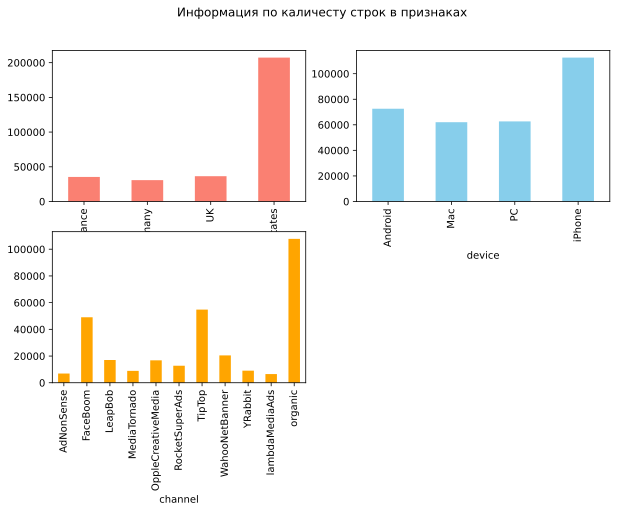

In [12]:
#Посмотрим данные в графическом виде в зависимости от параметр и их количства в присланных данных

fig, axs = plt.subplots(figsize=(10, 6) )

visits.groupby('region')['user_id'].agg('count').plot.bar(color = colors[3], ax=plt.subplot(2, 2, 1))
visits.groupby('device')['user_id'].agg('count').plot.bar(color = colors[1], ax=plt.subplot(2, 2, 2))
visits.groupby('channel')['user_id'].agg('count').plot.bar(color = colors[2], ax=plt.subplot(2, 2, 3))
fig. suptitle('Информация по каличесту строк в признаках');

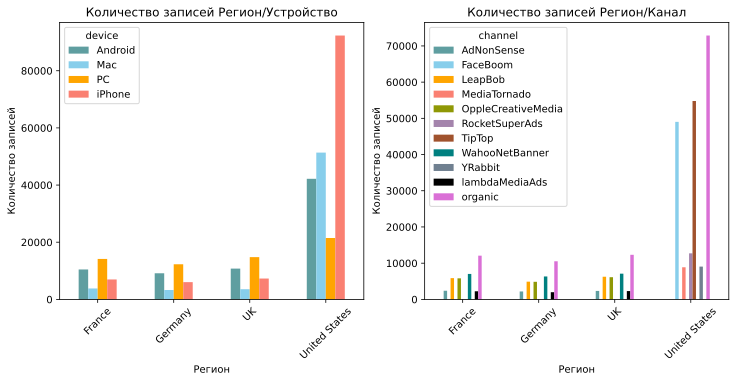

In [13]:
#Сгрупируем данные по ргиону  в графическом виде в зависимости от параметр и их количства в присланных данных
plt.figure(figsize=(12, 5))
(
    visits
    .pivot_table(index='region', columns='device', values ='user_id', aggfunc='count')
    .plot.bar(color=colors, ax=plt.subplot(121))
)
(
    visits
    .pivot_table(index='region', columns='channel', values ='user_id', aggfunc='count')
    .plot.bar(color=colors, ax=plt.subplot(122))
);

plt.subplot(121)
plt.title("Количество записей Регион/Устройство")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.xlabel("Регион")
plt.subplot(122)
plt.title("Количество записей Регион/Канал")
plt.xticks(rotation=45)
plt.ylabel("Количество записей")
plt.xlabel("Регион");

**вывод о журнале сессий пользователей** 
* Первая сессия в журнале 2019-05-01 00:00:41. Это соотвествует заявленному о том, что предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года
* Большего всего сессий из региона United States, устройста iPhone	и канала organic 
* Регионы France, Germany, UK имеют сравнительно одинаковое количество сессий 
* Во всех регионах больше всего значний у канала канала organic 
* IPhone выигрывает по количеству только в United States, в остальных ргионах лидирует PC, затем Android   

In [14]:
# Посмотрим на данные о заказах
orders.describe(include='all')

,user_id,event_dt,revenue
count,4.021200e+04,40212,40212.000000
unique,NaN,40163,NaN
top,NaN,2019-09-29 09:03:24,NaN
freq,NaN,2,NaN
first,NaN,2019-05-01 00:28:11,NaN
last,NaN,2019-10-31 23:56:56,NaN
mean,4.990295e+11,NaN,5.370608
std,2.860937e+11,NaN,3.454208
min,5.993260e+05,NaN,4.990000
25%,2.511324e+11,NaN,4.990000


In [15]:
orders.sample(10, random_state=1)

,user_id,event_dt,revenue
32012,419263491450,2019-07-30 23:59:07,4.99
38295,483568708610,2019-10-12 16:12:59,4.99
24544,448476047447,2019-10-16 06:11:23,4.99
29442,520659310653,2019-06-15 09:43:35,4.99
6270,680317225380,2019-07-05 13:01:50,4.99
11811,106927599817,2019-08-10 23:28:13,4.99
25721,854016361986,2019-10-21 21:52:12,4.99
12504,772315845552,2019-08-14 19:50:32,4.99
39984,662705152081,2019-10-29 13:53:48,4.99
13258,268123139092,2019-08-19 06:41:49,4.99


In [16]:
orders.revenue.value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

**вывод о журнале заказов**
* Первая сессия в журнале 2019-05-01 00:28:11. Это соотвествует заявленному.
* Большего всего значний 4.99 в количстве 38631

In [17]:
#Посмотрим на данные о затратах на рекламные компании
costs.describe(include='all')

,dt,channel,costs,month,week
count,1800,1800,1800.000000,1800.000000,1800.000000
unique,180,10,NaN,NaN,NaN
top,2019-10-04,TipTop,NaN,NaN,NaN
freq,10,180,NaN,NaN,NaN
mean,NaN,NaN,58.609611,7.444444,30.638889
std,NaN,NaN,107.740223,1.687749,7.426321
min,NaN,NaN,0.800000,5.000000,18.000000
25%,NaN,NaN,6.495000,6.000000,24.000000
50%,NaN,NaN,12.285000,7.000000,31.000000
75%,NaN,NaN,33.600000,9.000000,37.000000


In [18]:
costs.channel.value_counts()

TipTop                180
LeapBob               180
MediaTornado          180
OppleCreativeMedia    180
YRabbit               180
lambdaMediaAds        180
WahooNetBanner        180
RocketSuperAds        180
FaceBoom              180
AdNonSense            180
Name: channel, dtype: int64

In [19]:
costs.sample(10, random_state=1)

,dt,channel,costs,month,week
1462,2019-05-23,WahooNetBanner,7.200,5,21
510,2019-09-28,RocketSuperAds,11.375,9,39
612,2019-07-12,TipTop,288.600,7,28
1322,2019-07-02,OppleCreativeMedia,14.750,7,27
993,2019-08-02,AdNonSense,26.250,8,31
190,2019-05-11,MediaTornado,11.520,5,19
1716,2019-08-05,lambdaMediaAds,4.000,8,32
1048,2019-09-26,AdNonSense,34.650,9,39
1407,2019-09-25,OppleCreativeMedia,16.500,9,39
881,2019-10-09,YRabbit,3.840,10,41


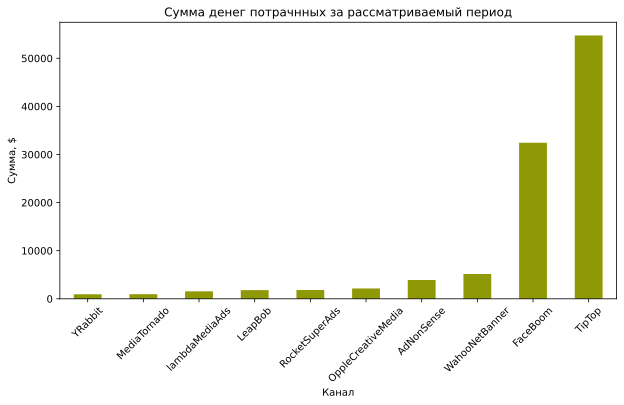

In [20]:
#Для наглядности представим данные в графическом виде
plt.figure(figsize=(10, 5))
costs.groupby('channel')['costs'].agg('sum').sort_values().plot.bar(color = colors[4])
plt.subplot()
plt.title("Сумма денег потрачнных за рассматриваемый период")
plt.xticks(rotation=45)
plt.ylabel("Сумма, $")
plt.xlabel("Канал");

In [21]:
#определеим первую дату в данных. Сверим ее с заявленой
costs.dt.min()

datetime.date(2019, 5, 1)

**вывод о журнале заказов**
* Первая запись в журнале о затратах  2019-05-01 Это соотвествует заявленному от том, что данные с 1 мая по 27 октября 2019 года
* По всем каналам одинаковое число записей. Видимо было проведено одинаковое колечство ркламных компаний 
* Больше всего затраты по каналу TipTop
* Второй по числу затрат FaceBoom
* Затраты по остальным каналам значительно меньше

## Функции для анализ данных

Функции для вычисления значений метрик:
* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV. 

Функции для построения графиков:
* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
* plot_ltv_roi — для визуализации LTV и ROI.

### Функции для вычисления значений метрик

#### Функция для создания пользовательских профиле

In [22]:
'''функция для создания пользовательских профилей'''

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = ( 
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')


    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles


#### Функция для расчёта удержания

In [23]:
''' функция для расчёта удержания'''

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

###  Функции для построения графиков

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(12, 12))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, color=colors
    )
    plt.legend().set_visible(False)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, color=colors
    )
    plt.legend().set_visible(False)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, color=colors)
    plt.legend().set_visible(False)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на \n {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4, color=colors)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на \n {}-й день'.format(
            horizon
        )
    )
    
    plt.legend(loc="lower left", bbox_to_anchor=(-0.99, -0.32), ncol= 5)
    plt.show()

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(12, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(121)
    conversion.T.plot(grid=True, ax=ax1, color=colors)
    ax1.legend().set_visible(False)
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(122, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, color=colors)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    
    plt.legend(loc="lower left", bbox_to_anchor=(-0.99, -0.32), ncol= 5)
    
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(10, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(321)
    ltv.T.plot(grid=True, color=colors, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(322, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(color=colors, grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(323, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(color=colors, grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(325)
    roi.T.plot(color=colors, grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(326, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(color=colors, grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))


    
    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

In [30]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
print('Минимальная дата привлечния пользоватлей:',profiles.dt.min())
print('Максимальная дата привлечния пользоватлей:',profiles.dt.max())

Минимальная дата привлечния пользоватлей: 2019-05-01
Максимальная дата привлечния пользоватлей: 2019-10-27


In [32]:
def payratio(cat):
    profiles_cat=profiles.pivot_table(index=cat, columns='payer',  values='user_id',aggfunc='count', margins=True)
    profiles_cat['percentage']=profiles_cat[True]/profiles_cat['All']
    profiles_cat['percentage_all']=profiles_cat[True]/profiles_cat['All'].sum()
    profiles_cat = (profiles_cat[0:-1].sort_values(by = False)
                                      .style.format({'percentage': '{:.4f}', 'percentage_all': '{:.4f}'})
                                      )
    return (profiles_cat)

In [33]:
#количество пользователей и доля платящих из каждой страны + доля от всех пользователей
payratio('region')

payer,False,True,All,percentage,percentage_all
region,,,,,
Germany,14365,616,14981,0.0411,0.0021
France,16787,663,17450,0.0380,0.0022
UK,16875,700,17575,0.0398,0.0023
United States,93100,6902,100002,0.0690,0.0230


Вывод:
* Больше всего пользователей из региона United States
* Другие регионы имеют стравнительно одинаковое количество пользователей, но значитльно мньше чем в регионе United States
* Больше всего платящих пользотватлей в регионе United States

In [34]:
# количество пользователей использующие приложение через устройства и доля платящих пользователей
payratio('device')

payer,False,True,All,percentage,percentage_all
device,,,,,
Mac,28130,1912,30042,0.0636,0.0064
PC,28918,1537,30455,0.0505,0.0051
Android,32982,2050,35032,0.0585,0.0068
iPhone,51097,3382,54479,0.0621,0.0113


**Вывод:**
* Больше всего пользователей используют приложение на устройстве iPhone
* Меньше всего на устройстве Mac
* Больше всего платящих пользователей используют приложение на устройстве iPhone
* Доля платящих от общего числа пользотвателей использующих устройства iPhone и Mac практически одинаковое
* Доля платящих пользователей от всех пользователей выше всего у пользователей использующих iPhone

In [35]:
# количество пользователей пришедшие из канала и доля платящих пользователей
payratio('channel')

payer,False,True,All,percentage,percentage_all
channel,,,,,
lambdaMediaAds,1924,225,2149,0.1047,0.0007
AdNonSense,3440,440,3880,0.1134,0.0015
RocketSuperAds,4096,352,4448,0.0791,0.0012
YRabbit,4147,165,4312,0.0383,0.0005
MediaTornado,4208,156,4364,0.0357,0.0005
WahooNetBanner,8100,453,8553,0.0530,0.0015
LeapBob,8291,262,8553,0.0306,0.0009
OppleCreativeMedia,8372,233,8605,0.0271,0.0008
TipTop,17683,1878,19561,0.0960,0.0063


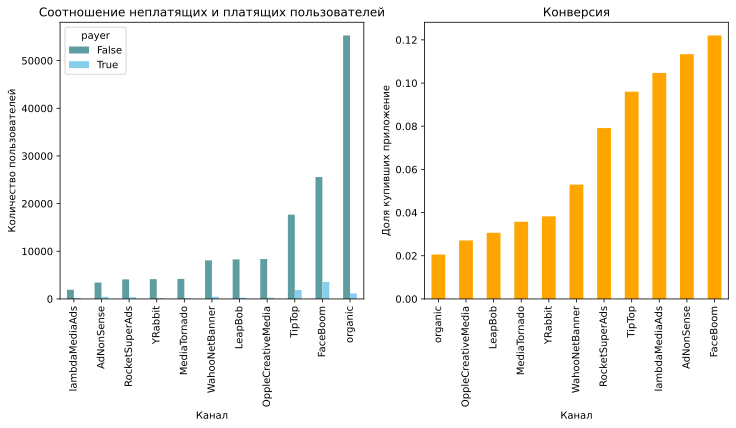

In [36]:
#для удобства анализа визуализируем данные

profiles_channel = payratio('channel').data

plt.figure(figsize=(12, 5))
ax1=(
    profiles_channel.iloc[:,0:2].sort_values(by=False).plot.bar(color=colors, ax=plt.subplot(1, 2, 1))
)
ax2=(
    profiles_channel.percentage.sort_values()
    .plot.bar(color=colors[2], ax=plt.subplot(1, 2, 2))
);
plt.subplot(121)
plt.title("Соотношение неплатящих и платящих пользователей")
plt.ylabel("Количество пользователей")
plt.xlabel("Канал")
plt.subplot(122)
plt.title("Конверсия")
plt.ylabel("Доля купивших приложение")
plt.xlabel("Канал");

**Вывод:**
* Больше всего пользователей пришли через канал organic
* Конверсия больше всего у канала FaceBoom, а меньше всего у канала organic
* Меньше всго пользователей пришли через канал lambdaMediaAds.
* Коверсия у канала organic, через остальные каналы, кроме FaceBoom и TipTop. Возможно стоит прекратить инвестировать в эти каналы или точно обратить внимание на их минимальную эффктивность. 

## Маркетинг

### Загрузите данные и подготовьте их к анализу

In [37]:
# Общие затраты на маркетинг за рассматриваемый период
costs.costs.sum().round()

105497.0

In [38]:
# Распределение затрат на маркетинг по каналам привлечения пользователей
costs.groupby('channel')['costs'].agg(sum).sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

* Больше всего потрачено денег на привлчение пользователй чрез канал TipTop
* Траты на канал TipTop это практически половина всех денег потраченных на рекламу
* Сумма затрат TipTop и FaceBoom составляет 80% от всех денег.
* Каналы кроме TipTop и FaceBoom имеют значительно меньшие траты
* Минимальные траты на канал YRabbit 944.22$

''

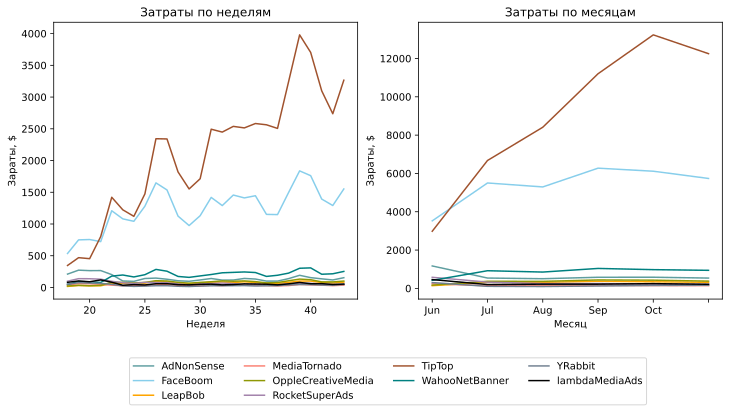

In [39]:
# посмотрим на изменение расходов во времени (по неделям и месяцам) по каждому источнику
plt.figure(figsize=(12, 5))
ax1= (
    costs
    .pivot_table(index=['week'], columns='channel', values='costs', aggfunc='sum')
    .plot(color=colors, ax=plt.subplot(1, 2, 1))
)

ax1.legend().set_visible(False)
ax2= (
    costs
    .pivot_table(index=['month'], columns='channel', values='costs', aggfunc='sum')
    .plot(color=colors, ax=plt.subplot(1, 2, 2))
)

x_ticks = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
ax2.set_xticklabels(x_ticks)

plt.subplot(121)
plt.title("Затраты по неделям")
plt.ylabel("Зараты, $")
plt.xlabel("Неделя")
plt.subplot(122)
plt.title("Затраты по месяцам")
plt.ylabel("Зараты, $")
plt.xlabel("Месяц")

plt.legend(loc="lower center", bbox_to_anchor=(-0.1, -0.4), ncol= 4);
;

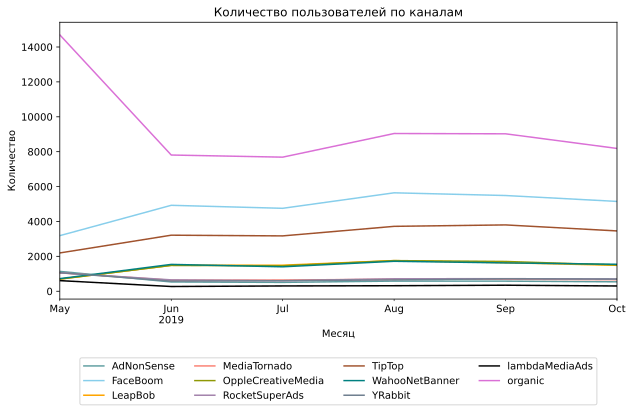

In [40]:
# посмотрим на изменение динамики привлечения пользователей по месяцам
fig, ax = plt.subplots(figsize=(10, 5))
profiles.pivot_table(index=['month'], columns='channel', values='user_id', aggfunc='nunique').plot(color=colors, ax=ax);
plt.title("Количество пользователей по каналам")
plt.xticks(rotation=45)
plt.ylabel("Количество")
plt.xlabel("Месяц")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol= 4);

Хорошо видно сезонное уменьшение пользователей на органическом канале.

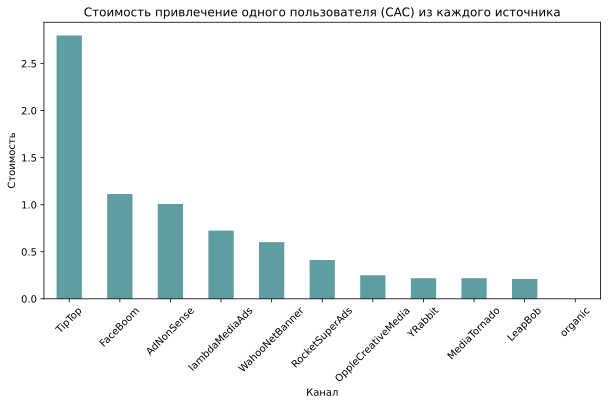

In [41]:
#определим и визуализирум стоимость привлечения одного пользотвалея(CAC)
cac_data =  profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

# визуализируем САС
plt.figure(figsize=(10, 5))
cac_data.plot.bar(color = colors[0]);

plt.title("Стоимость привлечение одного пользователя (CAC) из каждого источника")
plt.xticks(rotation=45)
plt.ylabel("Стоимость")
plt.xlabel("Канал");

**Вывод**
* Сумма потраченных денег за рассмариваемый период составила :  105 497  
* Большая часть суммы 51% была потрачена на канал TipTop, 30% - FaceBoom      
* Затраты на привлечени пользователй в летний период значительно ниже
* Стоимость привлечения пользоватля выше всего у канала TipTop. Однако в рейтинге конверсии данный канал находится на 4 месте.
* CAC канала TipTop значительно выше остальных каналов и составлят 2.799. Далее идет FaceBoom 1.11 и самый низкий у LeapBob 0.21

## Оценка окупаемости рекламы

In [42]:
#установим момент и горизонт анализа данных и зададим горизонт анализа.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14                                # горизонт анализа 

In [43]:
# так как мы считаем эффективность трат денег на привлечение пользователей через каналы, 
# то канал organic буду исключать из дальнейших расчётов

profiles = profiles.query('channel!="organic"')

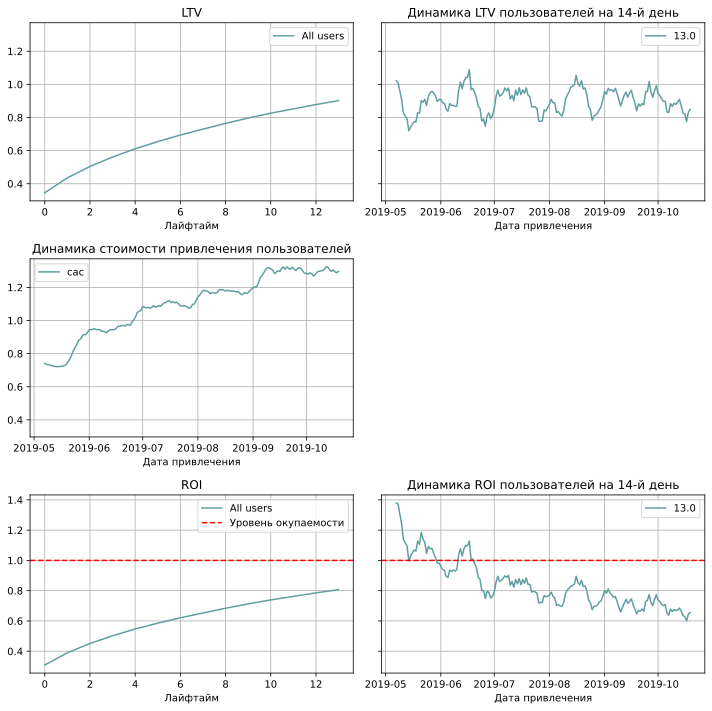

In [44]:
#посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:**
* Реклама не окупается. ROI в конце 14 дня — стремится к 80%.
* Динамика ROI: положительный ROI снижатся к июлю 2019 и становится ниже уровня окупаемости с тенденцией к дальнйшему снижению.
* CAC нестабилен, скачками возрастает так как увеличеваются траты на рекламу к концу периода.
* На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
* Cтабильность LTV и рост CAC, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.

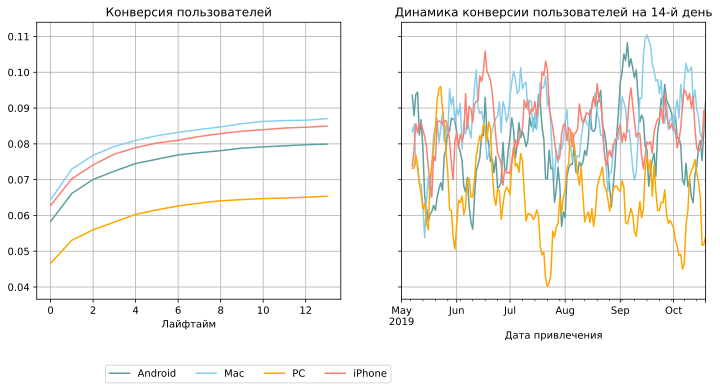

In [45]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**
* Пользователи на всех устройствах очень хорошо конвертируются.
* Лучше всего конвертируются пользователи на устройстве Mac, хуже всего на PC - с больими провалами

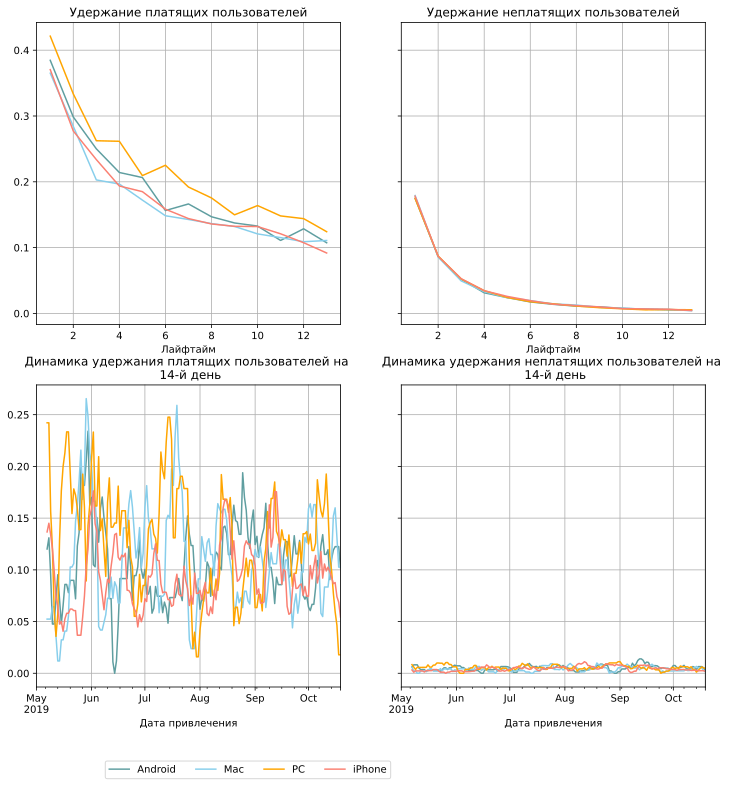

In [46]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Удержание платящих пользоватлей имеет одинаковый характер снижения к 14 дню  
Различие удержание между платящими и не платящими скорее всего из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку

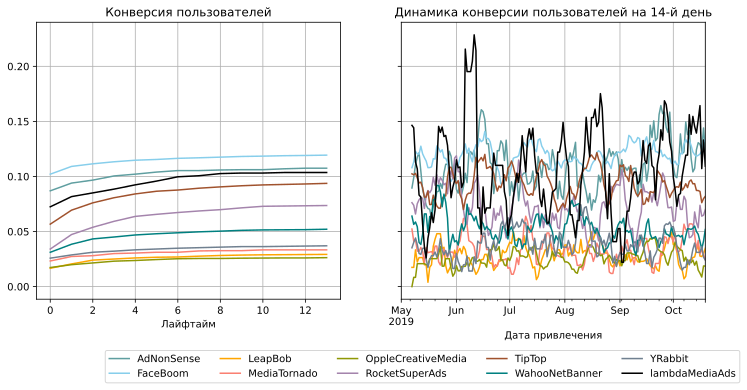

In [47]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**
* Конверсия у всех каналов разная.
* Самая  лучшая конверация у FaceBoom и она относительно одинаковая на всем рассматриваемом периоде.
* TipTop занимат 4 место в этом рейтинге.
* Самая худшая конврсия у канала OppleCreativeMedia 

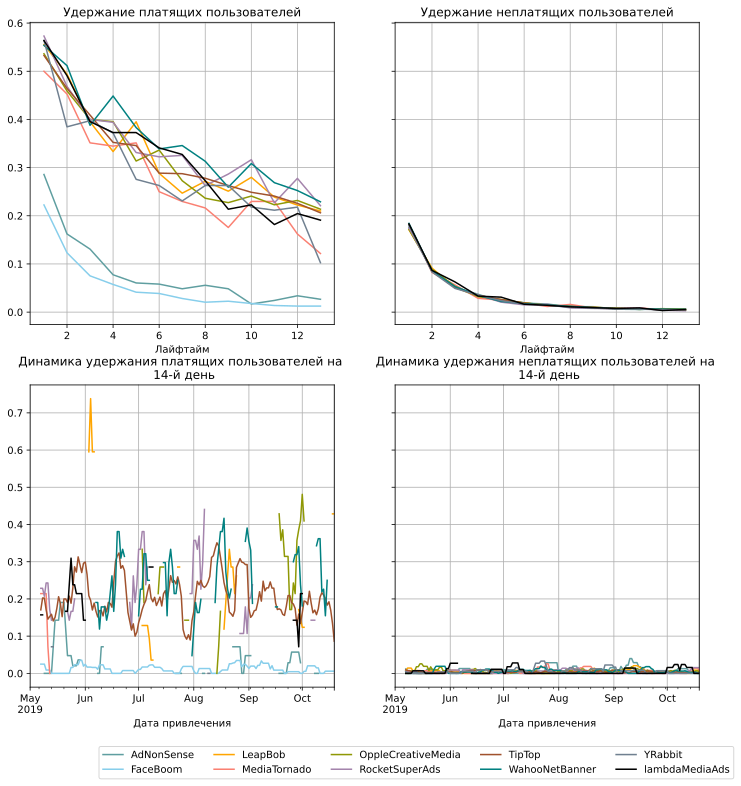

In [48]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Платящие пользоватлей для AdNonSense и FaceBoom значительно хуже удрживаются чем для остальных каналов

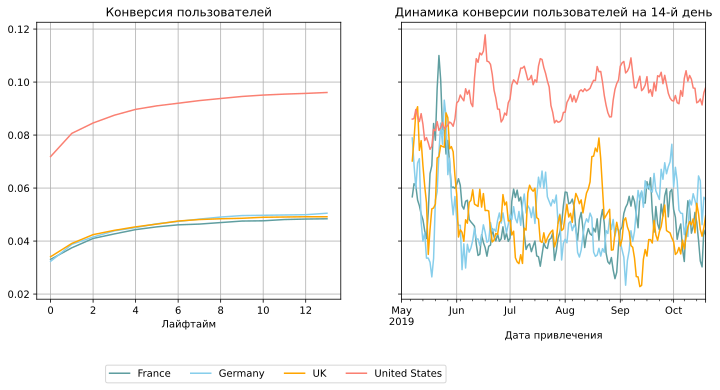

In [49]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**
* Конверсия в регионе US самая высокая. Возможно туда уходил всь бюджет на рекламу.Так как там самое большое число пользователей. 
* В остальных регионах конверсия ниже и сравнительно одинаковая.

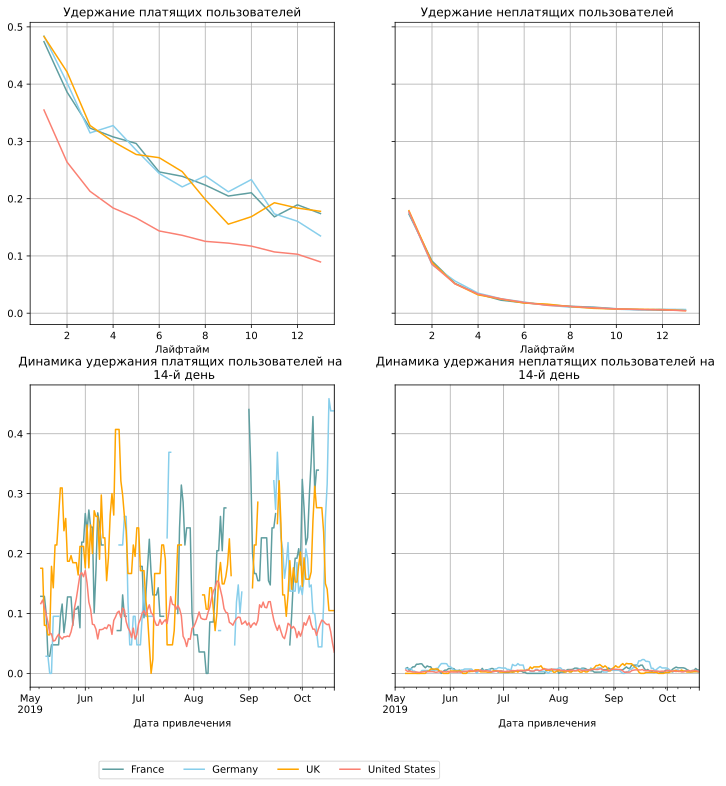

In [50]:
# смотрим удержание  с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Платящие пользоватлей для региона US значительно хуже удрживаются, чем для остальных регионов

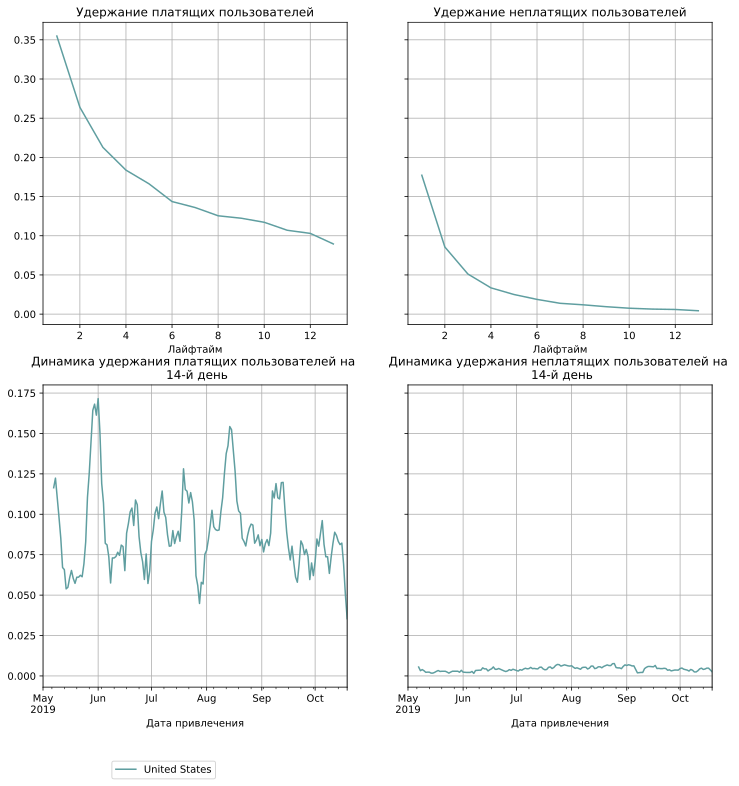

In [51]:
# смотрим удержание для US с разбивкой по каналам
profiles_us = profiles.query('channel!="organic" and region == "United States"')
profiles_us
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_us, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

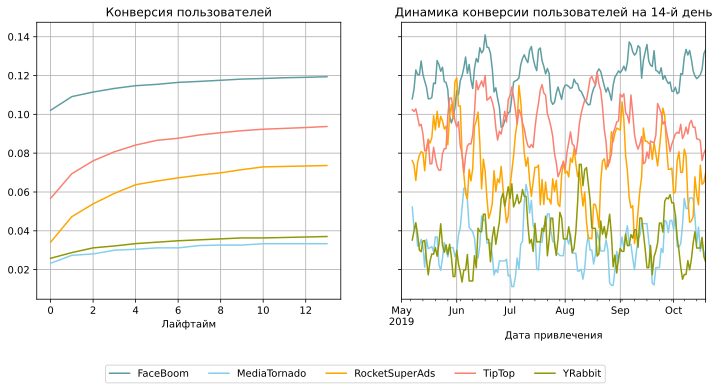

In [52]:
# смотрим конверсию для US с разбивкой по каналам
profiles_us = profiles.query('channel!="organic" and region == "United States"')
profiles_us
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

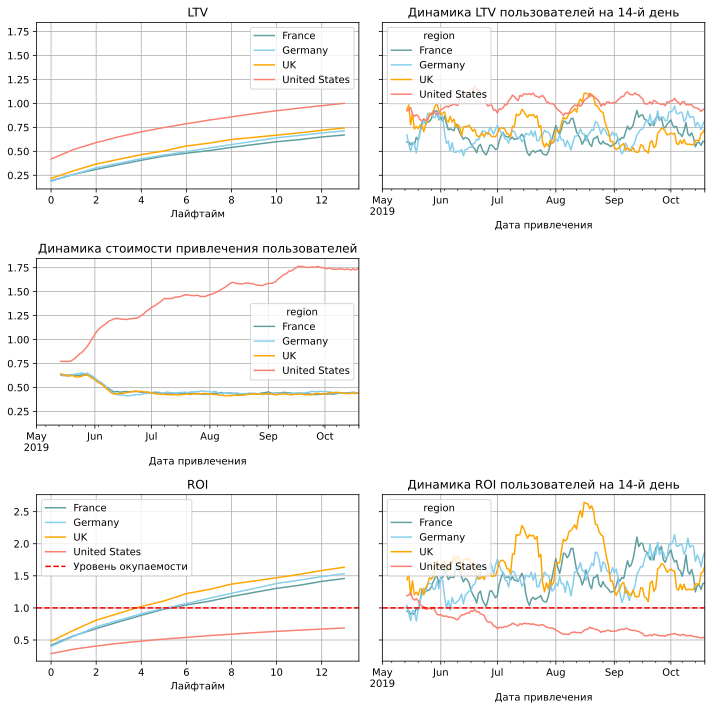

In [53]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* Реклама не окупается в US. ROI в конце 14 дня — стремится к 75%.
* Во всех каналах, кроме US ROI выше уровня окупаемости!
* Динамика ROI: аналогично, положительно кром US
* CAC нестабилен и растет только для US, для остальных региогов он отнасительно стабильный и намного ниже US.
* LTV выше всего у региона US

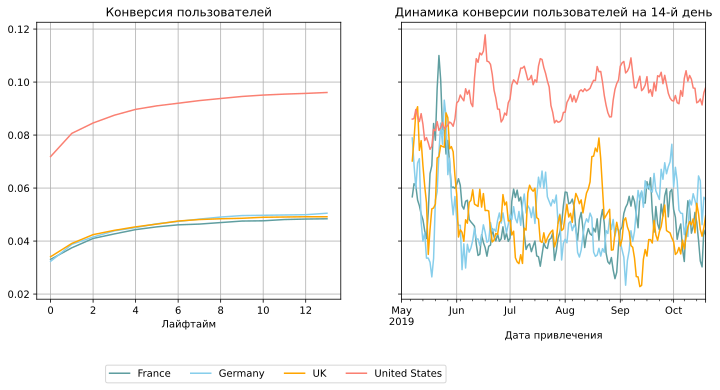

In [54]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

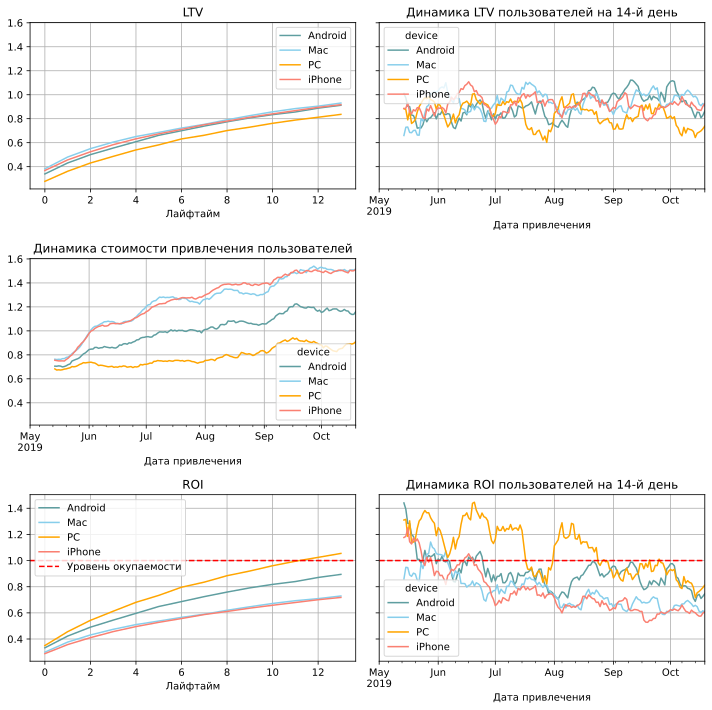

In [55]:
# смотрим окупаемость с разбивкой по каналу
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* Реклама не окупается в US. ROI в конце 14 дня — стремится к 75%.
* Во всех каналах, кроме US ROI выше уровня окупаемости!
* Динамика ROI: аналогично, положительно кроме US
* CAC нестабилен и растет только для US, для остальных регионов он относительно стабильный и намного ниже US.
* LTV выше всего у региона US

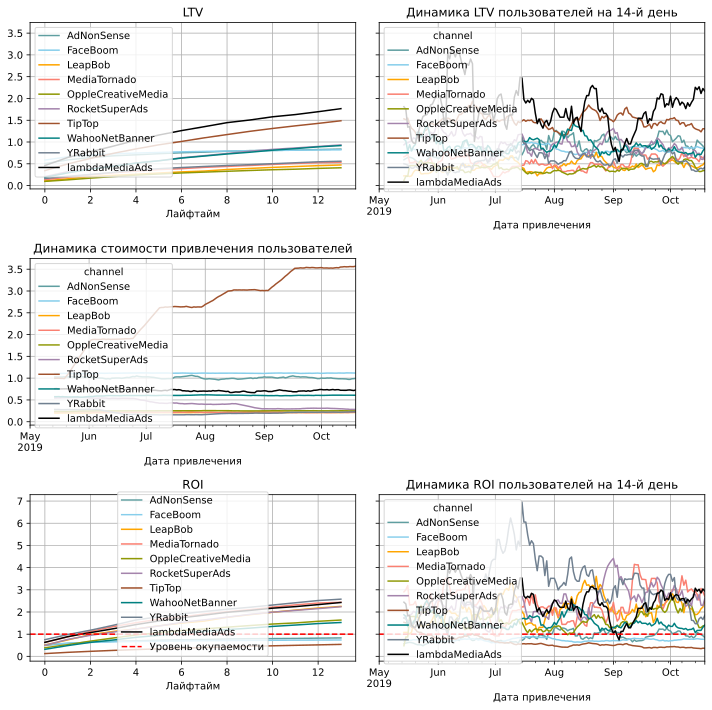

In [56]:
# определим окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы:**
* Реклама не окупается для каналов FaceBoom, AdNonSence, TipTop.
* Все остальные окупаются очень хорошо
* Динамика ROI: аналогично, положительна кром FaceBoom, AdNonSence, TipTop
* CAC стабильно растет только для TipTop
* LTV выше всего у LambdaMediaAds

**Общий вывод анализа окупаемости рекламы:**

В данном анализ рассматривается расходование денежных средств в размере 105497. На привлечение пользователей для использования приложения.

Предоставлены данные за период с 2019-05-01 по 2019-10-27.
Установлены регионы, каналы привлечения и устройства, на которых приложение работает.

Было выявлено:  
* Затраты на привлечение пользователей за рассматриваемый период не окупается. Компания терпит убытки. А затраты на конец периода только продолжают расти.  

* На окупаемость рекламы оказывают влияние:
*- регион: US
*- устройства: Android, Mac, iPhone
*- каналы: FaceBoom, AdNonSence, TipTop

Основное число пользователей приложения находится в регионе US - 100 002 уникальных пользователей(из 149 000 всего пользователей)  
Только в одном регионе, US отсутствует окупаемость. Но так как это регион с значительно большей долей пользователей. Рекламная компания терпит убытки.
Платящие пользователи в US хуже всего удерживаются. Однако конвртация в этом регионе хорошая 
Инвестиции в рекламу на устройствах Android, Mac, iPhone не окупается. Окупается только PC, у которого самая низкая конверсия и самое хорошее удержание платящих пользователей. Окупаемость удается достигать благодаря самому низкому значению затрат на привлечение пользователей CAC.
Наихудшие каналы по окупаемости, куда больше всего уходит денег на рекламу TipTop и FaceBoom. Большая часть денежных средств, а именно 51% была потрачена на канал TipTop, 30% - FaceBoom. У TipTop самая высокая стоимость привлечения пользователей, которая уверенно растут к концу исследуемого периода. Faceboom имеет само низко удержании платящих пользователей.

**Рекомендации для рекламного отдела**
* Так как стратегия инвестирования только в один региона показала себя не с лучшей стороны стоит рассмотреть остальные рынки и увеличить рекламные компании в этих регионах
* Так как на Европейском рынке самое популярное устройство, которое использутся - PC и это единственное устройство, которое окупилось, стоит обратить пристальное внимание. Строить рекламную компанию с учетом специфики региона и популярности устройства.
* Рассмотреть увеличение конверсии на органическом канале. Его высокое значение и конверсия свидетельствуют, что интерес к приложению большой и продукт узнаваем. Правда только опять в регионе US. Хорошая точка роста.
* Сократить инвестиции и понять причина роста CAC канала TipTop. Возможно есть проблемы с переходом из данного канала. Неоходимо проанализировать воронку для данного устрояства. Сильная разница с другими устройствами.
